In [3]:
# Importujemy potrzebne biblioteki
import pandas as pd
from pathlib import Path

# Wczytanie danych
BASE_DIR = Path.cwd().parent
train_data = pd.read_csv(BASE_DIR / 'data/external/train.csv')
test_data = pd.read_csv(BASE_DIR / 'data/external/test.csv')

# Podstawowe informacje o danych
print("Train Data Overview:")
print(train_data.info())
print("\nTest Data Overview:")
print(test_data.info())

# Sprawdzanie brakujących wartości
print("\nMissing values in train data:")
print(train_data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())

# Podstawowe statystyki dla cech numerycznych
print("\nNumerical Features Statistics:")
print(train_data.describe())

# Rozkład zmiennej docelowej (Survived)
print("\nSurvival Distribution:")
print(train_data['Survived'].value_counts(normalize=True))

Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

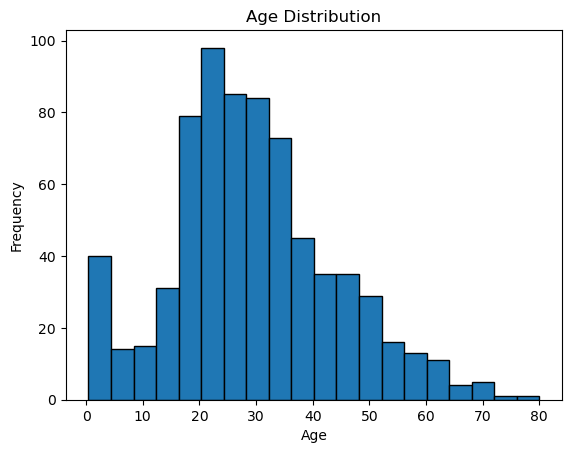


Survival by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


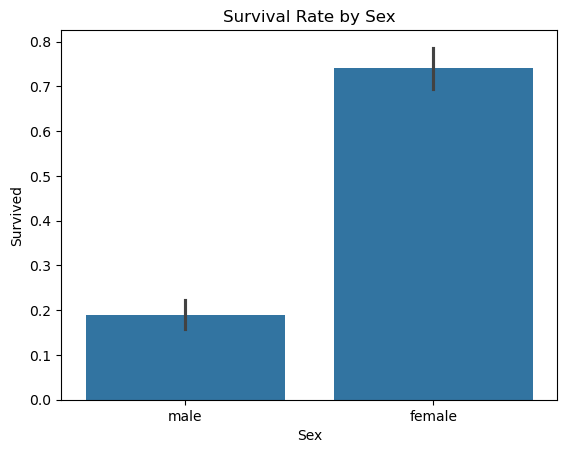


Survival by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


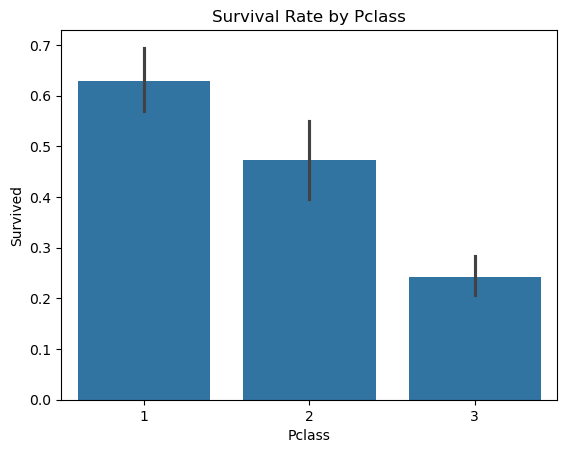

In [4]:
# Wizualizacja rozkładu wiekowego
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(train_data['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analiza wpływu płci na przeżycie
print("\nSurvival by Sex:")
print(train_data.groupby('Sex')['Survived'].mean())

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

# Analiza wpływu klasy na przeżycie
print("\nSurvival by Pclass:")
print(train_data.groupby('Pclass')['Survived'].mean())

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.show()